In [ ]:
#PART A

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msno

In [2]:
BHdata = pd.read_csv('Boston_housing_data.csv')
BHdata.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Boston Housing Data
#CRIM = per capita crime by town
#ZN = proportion of residential land zoned for lots over 25,000 sq.ft
#INDUS = proportion of non-retail business acres per town
#chas = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#nox = nitric oxides concentration (parts per 10 million)
#rm = average number of rooms per dwelling
#age = proportion of owner-occupied units built prior to 1940
#dis = weighted distances to five Boston employment centres
#rad = index of accessibility to radial highways
#tax = full-value property-tax rate per $10,000
#ptratio = pupil-teacher ratio by town
#black = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#lstat = % lower status of the population
#medv = Median value of owner-occupied homes in $1000's
#medv = target, 't'

In [4]:
#basis information
BHdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
BHdata.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#correlation table
BHdata.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
BHdata.shape

(506, 14)

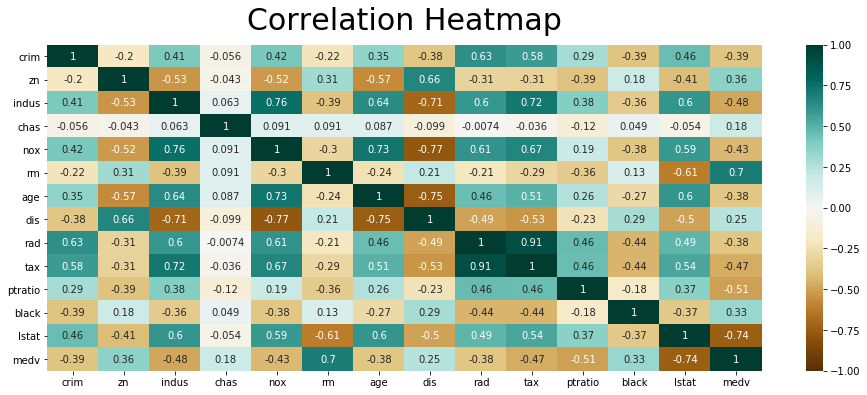

In [8]:
#build obvious correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(BHdata.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=15);

In [9]:
#rad and tax have positive correlation, nox and dis have high negative correlation

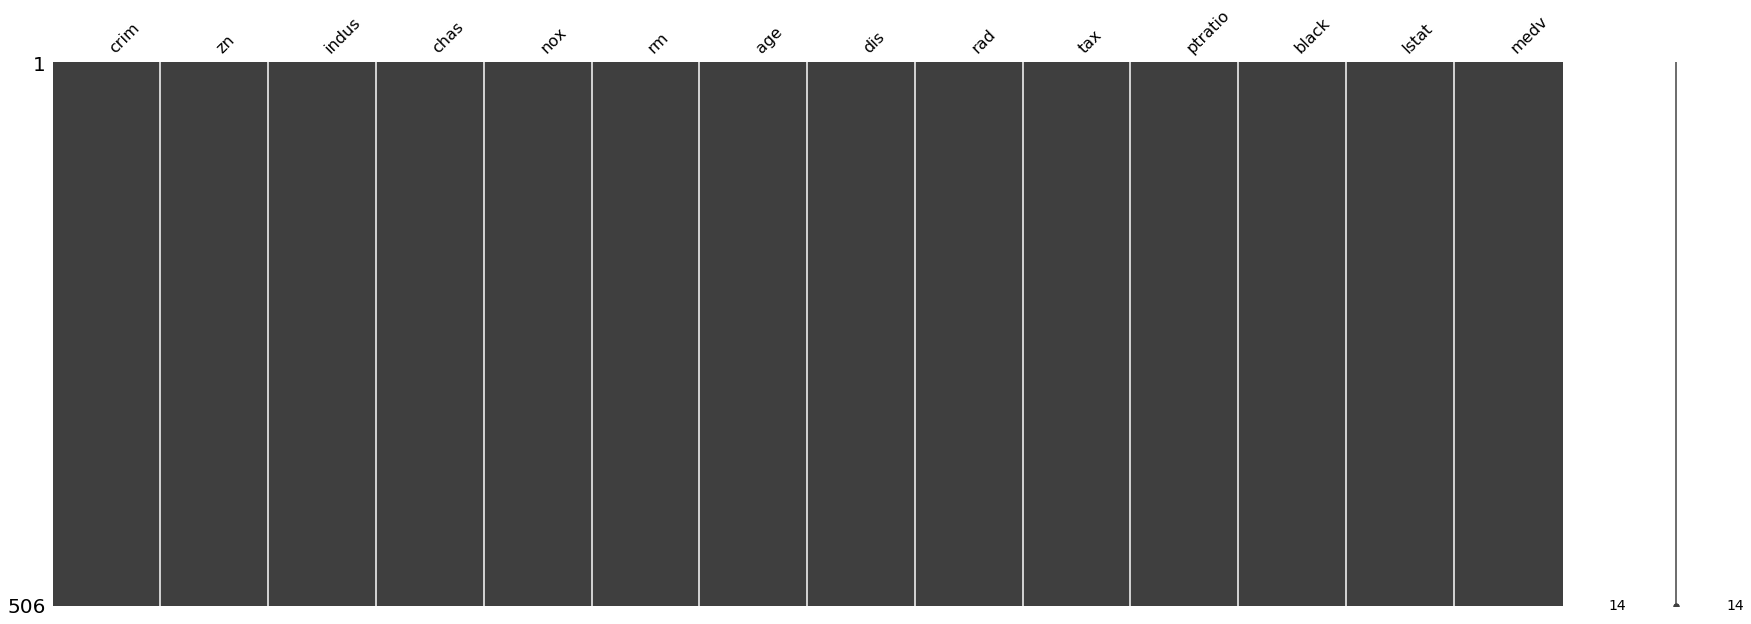

In [10]:
#use missingno to deal with missing value
msno.matrix(BHdata, figsize = (30,10))

In [11]:
#confirming there is no missing data
BHdata.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [12]:
#There's no missing data

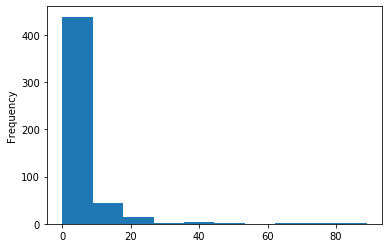

In [13]:
#Frequency plot to detect outliers
BHdata.crim.plot.hist()
#Has outliers

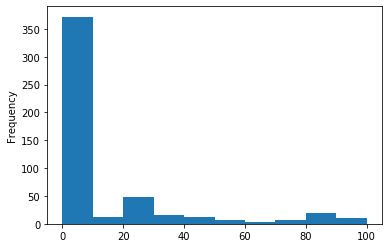

In [14]:
BHdata.zn.plot.hist()
#might have outliers

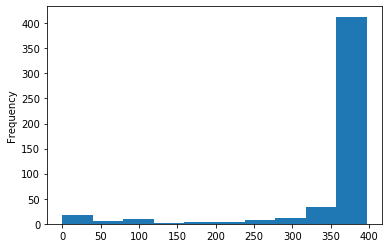

In [15]:
BHdata.black.plot.hist()
#Has outliers

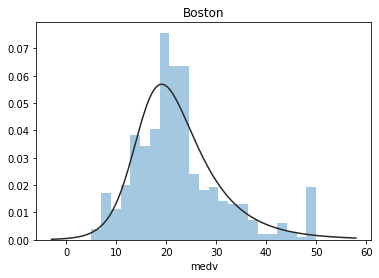

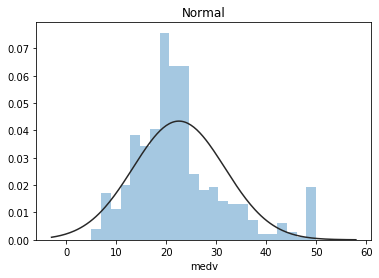

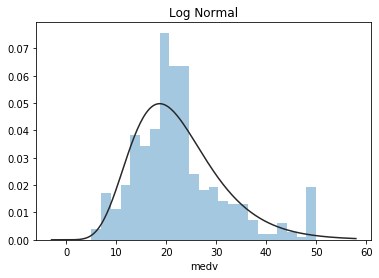

In [16]:
#use different ways to achieve normal distribution
import scipy.stats as st
y = BHdata['medv']
plt.figure(1); plt.title('Boston')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [17]:
#johnsonsu and log-transformation might perform better

In [18]:
#threholds for normal dis: skewness=0 and kurtosis=3

Skewness: 1.108098
Kurtosis: 1.495197


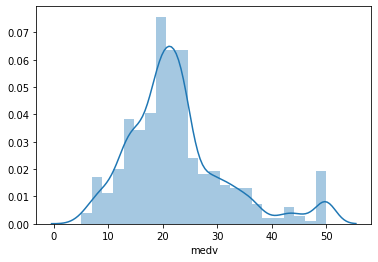

In [19]:
sns.distplot(BHdata['medv']);

#skewness and kurtosis
print("Skewness: %f" % BHdata['medv'].skew())
print("Kurtosis: %f" % BHdata['medv'].kurt())
#Data is not normally distributed, medv likely contains extreme values, and is skewed based on these results as both are >1
#This will likely impact our linear regression model performance

Skewness: 0.729308
Kurtosis: -0.064667


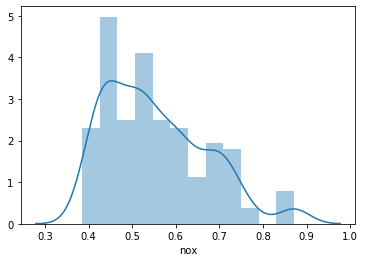

In [20]:
sns.distplot(BHdata['nox']);

print("Skewness: %f" % BHdata['nox'].skew())
print("Kurtosis: %f" % BHdata['nox'].kurt())
#No log transformation needed

Skewness: 0.403612
Kurtosis: 1.891500


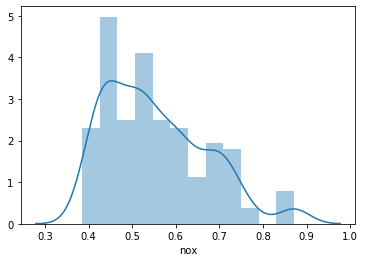

In [21]:
sns.distplot(BHdata['nox']);

print("Skewness: %f" % BHdata['rm'].skew())
print("Kurtosis: %f" % BHdata['rm'].kurt())
#Kurtorsis is high but skewness is reasonable - log transformation results in even higher kurtosis

Skewness: -2.890374
Kurtosis: 7.226818


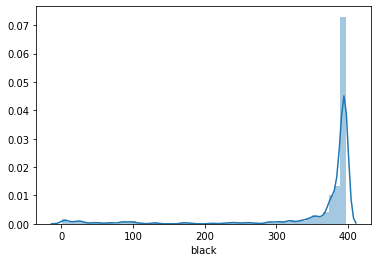

In [22]:
sns.distplot(BHdata['black']);

print("Skewness: %f" % BHdata['black'].skew())
print("Kurtosis: %f" % BHdata['black'].kurt())
#Very skewed and possibly lots of outliers - will have to revist later 

Skewness: 5.223149
Kurtosis: 37.130509


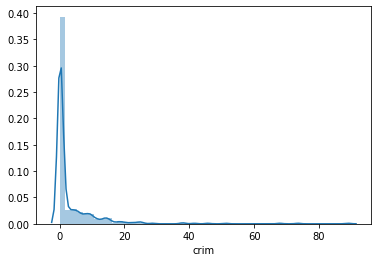

In [23]:
sns.distplot(BHdata['crim']);

print("Skewness: %f" % BHdata['crim'].skew())
print("Kurtosis: %f" % BHdata['crim'].kurt())
#again lots of outliers and data is heavily skewed

Skewness: 0.405934
Kurtosis: -1.009698


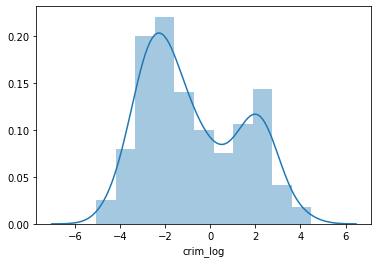

In [24]:
BHdata['crim_log'] = np.log(BHdata['crim'])

sns.distplot(BHdata['crim_log']);
print("Skewness: %f" % BHdata['crim_log'].skew())
print("Kurtosis: %f" % BHdata['crim_log'].kurt())
BHdata.drop('crim', axis= 1, inplace=True)
#dropping old column
#Log transformation definitely improves distribution of the data in crim - will leave as log transformation

Skewness: 2.225666
Kurtosis: 4.031510


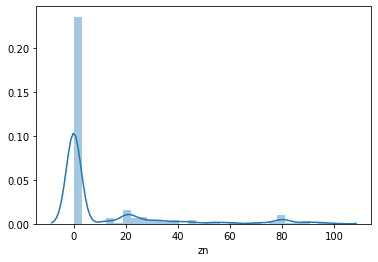

In [25]:
sns.distplot(BHdata['zn']);

print("Skewness: %f" % BHdata['zn'].skew())
print("Kurtosis: %f" % BHdata['zn'].kurt())
#again lots of outliers and data is heavily skewed

Skewness: 0.403612
Kurtosis: 1.891500


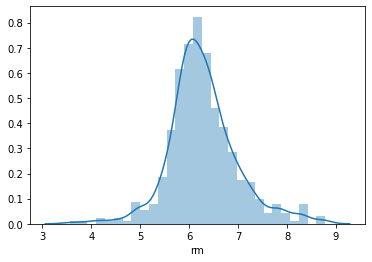

In [26]:
sns.distplot(BHdata['rm']);

print("Skewness: %f" % BHdata['rm'].skew())
print("Kurtosis: %f" % BHdata['rm'].kurt())
#values acceptable - no need for log transformation

Skewness: -0.598963
Kurtosis: -0.967716


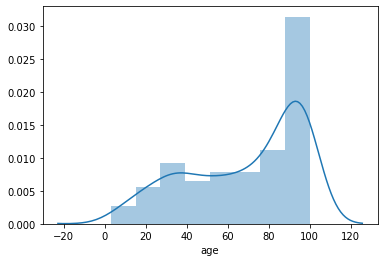

In [27]:
sns.distplot(BHdata['age']);

print("Skewness: %f" % BHdata['age'].skew())
print("Kurtosis: %f" % BHdata['age'].kurt())
#values acceptable - no need for log transformation

Skewness: 1.011781
Kurtosis: 0.487941


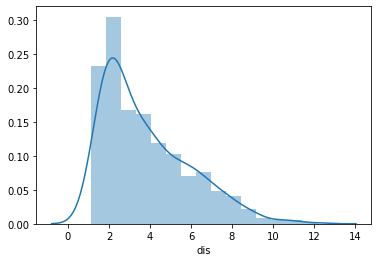

In [28]:
sns.distplot(BHdata['dis']);

print("Skewness: %f" % BHdata['dis'].skew())
print("Kurtosis: %f" % BHdata['dis'].kurt())
#values acceptable - no need for log transformation

Skewness: 1.004815
Kurtosis: -0.867232


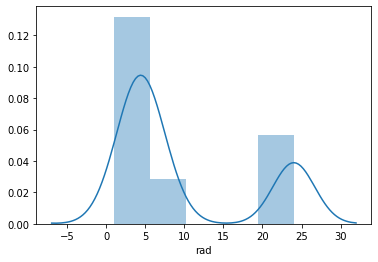

In [29]:
sns.distplot(BHdata['rad']);

print("Skewness: %f" % BHdata['rad'].skew())
print("Kurtosis: %f" % BHdata['rad'].kurt())
#values acceptable - no need for log transformation for feature characteristic

Skewness: 0.669956
Kurtosis: -1.142408


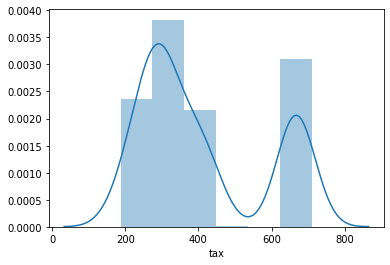

In [30]:
sns.distplot(BHdata['tax']);

print("Skewness: %f" % BHdata['tax'].skew())
print("Kurtosis: %f" % BHdata['tax'].kurt())
#values acceptable - no need for log transformation for feature characteristic

Skewness: -0.802325
Kurtosis: -0.285091


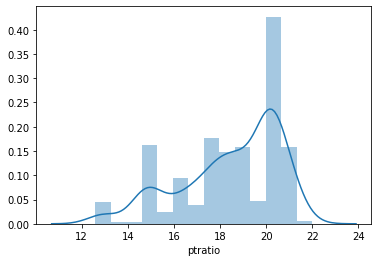

In [31]:
sns.distplot(BHdata['ptratio']);

print("Skewness: %f" % BHdata['ptratio'].skew())
print("Kurtosis: %f" % BHdata['ptratio'].kurt())
#values acceptable - no need for log transformation

Skewness: 0.906460
Kurtosis: 0.493240


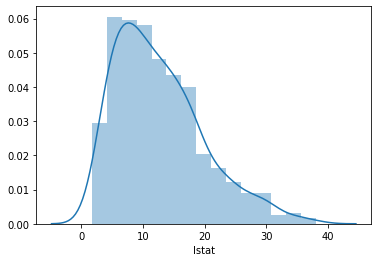

In [32]:
sns.distplot(BHdata['lstat']);

print("Skewness: %f" % BHdata['lstat'].skew())
print("Kurtosis: %f" % BHdata['lstat'].kurt())
#values acceptable - no need for log transformation

In [33]:
BHdata.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_log
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-3.601235
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-2.672924


In [34]:
numerical_feats = BHdata.dtypes[BHdata.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(BHdata[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(BHdata[col].kurt())  
         )
#Summary of skewness and kurtosis
#log transformations on zn, black and chas do not improve these metrics so will leave them as is

Number of Numerical features:  14
zn              Skewness: 02.23     Kurtosis: 004.03
indus           Skewness: 00.30     Kurtosis: -01.23
chas            Skewness: 03.41     Kurtosis: 009.64
nox             Skewness: 00.73     Kurtosis: -00.06
rm              Skewness: 00.40     Kurtosis: 001.89
age             Skewness: -0.60     Kurtosis: -00.97
dis             Skewness: 01.01     Kurtosis: 000.49
rad             Skewness: 01.00     Kurtosis: -00.87
tax             Skewness: 00.67     Kurtosis: -01.14
ptratio         Skewness: -0.80     Kurtosis: -00.29
black           Skewness: -2.89     Kurtosis: 007.23
lstat           Skewness: 00.91     Kurtosis: 000.49
medv            Skewness: 01.11     Kurtosis: 001.50
crim_log        Skewness: 00.41     Kurtosis: -01.01


In [35]:
threshold = 0.7
# Threshold for removing correlated variables

In [36]:
#detecting correlation from correlation matrix
corr_matrix = BHdata.corr().abs()
print(corr_matrix)

                zn     indus      chas       nox        rm       age  \
zn        1.000000  0.533828  0.042697  0.516604  0.311991  0.569537   
indus     0.533828  1.000000  0.062938  0.763651  0.391676  0.644779   
chas      0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox       0.516604  0.763651  0.091203  1.000000  0.302188  0.731470   
rm        0.311991  0.391676  0.091251  0.302188  1.000000  0.240265   
age       0.569537  0.644779  0.086518  0.731470  0.240265  1.000000   
dis       0.664408  0.708027  0.099176  0.769230  0.205246  0.747881   
rad       0.311948  0.595129  0.007368  0.611441  0.209847  0.456022   
tax       0.314563  0.720760  0.035587  0.668023  0.292048  0.506456   
ptratio   0.391679  0.383248  0.121515  0.188933  0.355501  0.261515   
black     0.175520  0.356977  0.048788  0.380051  0.128069  0.273534   
lstat     0.412995  0.603800  0.053929  0.590879  0.613808  0.602339   
medv      0.360445  0.483725  0.175260  0.427321  0.695360  0.37

In [37]:
#upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

          zn     indus      chas       nox        rm       age       dis  \
zn       NaN  0.533828  0.042697  0.516604  0.311991  0.569537  0.664408   
indus    NaN       NaN  0.062938  0.763651  0.391676  0.644779  0.708027   
chas     NaN       NaN       NaN  0.091203  0.091251  0.086518  0.099176   
nox      NaN       NaN       NaN       NaN  0.302188  0.731470  0.769230   
rm       NaN       NaN       NaN       NaN       NaN  0.240265  0.205246   
age      NaN       NaN       NaN       NaN       NaN       NaN  0.747881   
dis      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
rad      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tax      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
ptratio  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
black    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
lstat    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
medv     NaN

In [44]:
#select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 6 columns to remove.


In [45]:
#may have removed the highly correlated features and select most relevant features
BHdata1 = BHdata.drop(columns = to_drop)

BHdata1.head()

,zn,indus,chas,rm,rad,ptratio,black,lstat
0,18.0,2.31,0,6.575,1,15.3,396.90,4.98
1,0.0,7.07,0,6.421,2,17.8,396.90,9.14
2,0.0,7.07,0,7.185,2,17.8,392.83,4.03
3,0.0,2.18,0,6.998,3,18.7,394.63,2.94
4,0.0,2.18,0,7.147,3,18.7,396.90,5.33


##TASK -2

In [1]:
#lstat, rm and ptratio are three most relevant features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data = pd.read_csv('Boston_housing_data.csv')
x = data[['rm','dis','tax']]
y = np.array(data[["medv"]])

#standardization
x = (x-x.mean(axis=0))/x.std(axis=0)
y = (y-y.mean(axis=0))/y.std(axis=0)

#adding constant
x = np.column_stack((np.ones(len(x)), x))

In [3]:
#closed-form solution
x = np.asmatrix(x)
lin_betas = np.linalg.inv(x.T*x) * x.T * y.reshape(506,1)
print(lin_betas)

[[ 7.59114993e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


In [4]:
# beta_0
lin_intercept = lin_betas[0,0]
print("intercept (beta_0): {0:.4f}".format(lin_intercept))

# beta_1
lin_beta = lin_betas[1,0]
print("beta_1: {0:.4f}".format(lin_beta))

# beta_2
lin_beta = lin_betas[2,0]
print("beta_2: {0:.4f}".format(lin_beta))

# beta_3
lin_beta = lin_betas[3,0]
print("beta_3: {0:.4f}".format(lin_beta))

intercept (beta_0): 0.0000
beta_1: 0.6135
beta_2: -0.0429
beta_3: -0.3127


In [20]:
#define logic of gradient descent
def Gradient_Descent_Algo(x, y, beta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        model_0 = np.dot(x, beta)
        loss_temp = model_0 - y
        loss = np.sum(np.square(loss_temp)) / (2 * m)
        loss_total[i]= loss
        gradient = np.dot(xTrans, loss_temp) / m
        beta = beta - alpha * gradient
        beta_total[i,:]= beta.transpose()
    return beta

In [17]:
#get parameters by gradient descent using alpha=0.01
numIterations= 100
alpha = 0.01
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 6.98298405e-15]
 [ 6.09697341e-01]
 [-2.87151795e-02]
 [-3.01783695e-01]]


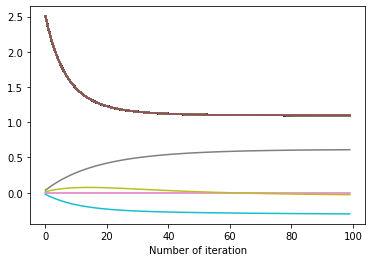

In [493]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()

In [434]:
#get parameters by gradient descent using alpha=0.1
numIterations= 100
alpha = 0.1
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
# parameters starting values
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.29581412e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


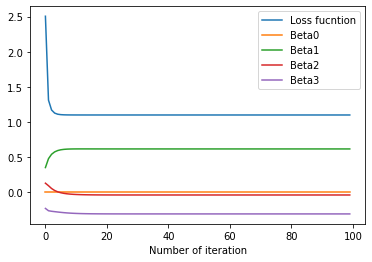

In [422]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()
#fig1

In [435]:
#get parameters by gradient descent using alpha=0.05
numIterations= 100
alpha = 0.05
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.28880652e-15]
 [ 6.13514229e-01]
 [-4.28847240e-02]
 [-3.12742742e-01]]


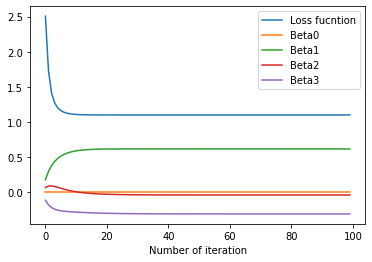

In [428]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()

In [436]:
#get parameters by gradient descent using alpha=0.18
numIterations= 100
alpha = 0.18
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.30188187e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


In [ ]:
#the most close one to closed-form solution

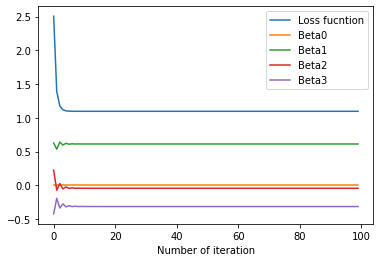

In [430]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()

In [33]:
#get parameters by gradient descent using alpha=0.189
numIterations= 100
alpha = 0.189
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.30236663e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


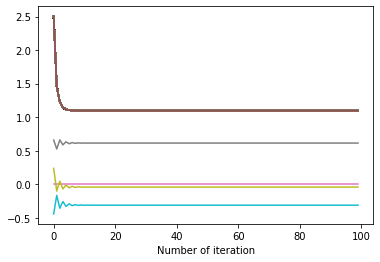

In [35]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()

In [36]:
#get parameters by gradient descent using alpha=0.189 and change numIterations to 500
numIterations= 500
alpha = 0.189
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.30236663e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


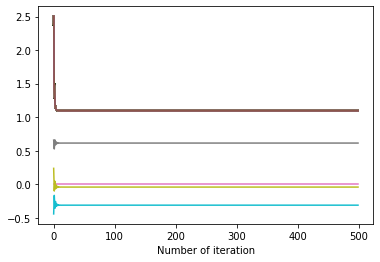

In [38]:
#loss function figure for each beta
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.plot(beta_total[:,2], label = "Beta2")
plt.plot(beta_total[:,3], label = "Beta3")
plt.xlabel("Number of iteration")
plt.show()

In [39]:
#get parameters by gradient descent using alpha=0.189 and change numIterations to 1000
numIterations= 1000
alpha = 0.189
m = 101
loss_total= np.zeros((numIterations,506))
beta_total= np.zeros((numIterations,4))
beta_initial = np.reshape(np.zeros(4),(4, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[ 7.30236663e-15]
 [ 6.13514098e-01]
 [-4.28853401e-02]
 [-3.12743419e-01]]


In [44]:
#apply 5-fold cs
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Boston_housing_data.csv')
x = data[['rm','dis','tax']]
y = np.array(data[["medv"]])

#standardization
x = (x-x.mean(axis=0))/x.std(axis=0)
y = (y-y.mean(axis=0))/y.std(axis=0)

#adding constant
x = np.column_stack((np.ones(len(x)), x))

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

#hold 1/5 as test set
regressor = RidgeCV(alphas=(0.2, 0.15, 0.1, 0.075, 0.05, 0.01, 0.005, 0.001), store_cv_values=True)
regressor.fit(train_x, train_y)
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)
#compare each mse value
#alpahs= 0.2 to 0.15 perform better

[[0.41618266 0.41618448 0.41618632 0.41618725 0.41618818 0.41618968
  0.41618986 0.41619001]]


In [45]:
#pick alphas with the samllest mse value and do further test 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RidgeCV(alphas=(0.19,0.18,0.17,0.16), store_cv_values=True)
regressor.fit(train_x, train_y)
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)
#compare each mse value
#alpahs= 0.19 to 0.18 perform better

[[0.41618302 0.41618339 0.41618375 0.41618412]]


In [46]:
#pick alphas with the samllest mse value and do further test 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RidgeCV(alphas=(0.189, 0.188, 0.187, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181), store_cv_values=True)
regressor.fit(train_x, train_y)
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)
#compare each mse value
#alpahs= 0.1890 perform better

[[0.41618306 0.4161831  0.41618313 0.41618317 0.4161832  0.41618324
  0.41618328 0.41618331 0.41618335]]


In [47]:
#optimal learing rate
print(regressor.alpha_)

0.189
